# My Plotting Tool for the Corona Virus Data
Source of the data: [Johns Hopkins University Center for Systems Science and Engineering](https://github.com/CSSEGISandData/COVID-19)

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import csv

from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

matplotlib.rcParams.update({'font.size': 13})

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
formatter = DateFormatter('%m/%d')

Let's first load the data

In [2]:
def readMyFile(filename):
    dates = []
    data = {}
    with open(filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for i,row in enumerate(csvReader):
            if i==0: 
                
                dates = np.array([datetime.strptime(date, '%m/%d/%y') for date in row[4:] ])
            else:
                county = row[1]
                if county=='Mainland China': county='China'
                number = row[4:]
                if county in data:
                    data[county] += np.array([int(n) for n in number])
                else:
                    data[county] = np.array([int(n) for n in number])
            
    return dates, data


dates, confirmed = readMyFile('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
dates, death = readMyFile('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
dates, recovered = readMyFile('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

datemin=dates[0]
datemax=dates[-1]

Plot the results

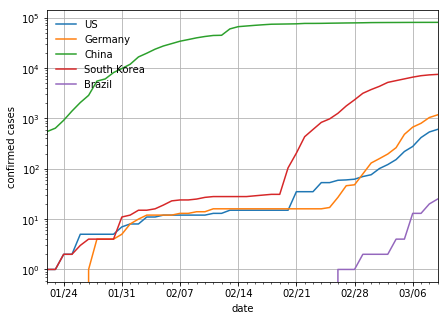

In [8]:
countries = ['US','Germany','China','South Korea','Brazil']

fig, ax = plt.subplots(figsize=(7,5))

for country in countries:
    ax.plot_date(dates, confirmed[country],ls="solid",marker=None,label=country)  

ax.set_xlim(datemin,datemax)
ax.set_xlabel(r'date')
ax.set_ylabel(r'confirmed cases')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(days)
ax.set_yscale("log")
ax.legend(loc="upper left",frameon=False,)
ax.grid(True)

plt.show()